#### Name: Zhornichenko Ilya Alekseevich
#### Group: TMSS
#### Higher school of economics
#### Implementation for Rosenstien algo to calculate maximum exponent

In [2]:
"""defining libraries to download"""

#!pip install hdbscan
#!pip install dbscan1d
#!pip install --upgrade s-dbw
#!pip install validclust

"""importing libraries"""
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
import random 
from dbscan1d.core import DBSCAN1D

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
import warnings
#from dbscan1d.core import DBSCAN1D
######################################################
# df = pd.read_fwf(lorenz.txt')
df = pd.read_fwf('lorenz.txt')

x = np.float32(np.array(df.iloc[:,0])[13000:23000])
y_true = np.float32(np.array(df.iloc[:,0])[23000:23600])
pattern_set = [[i1, i2, i3] for i1 in np.arange(1, 11, 1) # шаблон 
               for i2 in np.arange(1, 11, 1)
               for i3 in np.arange(1, 11, 1)]


def ones_patters(a, n, pat = None):
    if pat == None:
        pat = np.int_(np.ones(n))
    b = np.int_(np.append([0], np.cumsum(pat)))    
    l = []
    for i in range(a.shape[0] - np.sum(pat)): 
        l.append(a[b].reshape(1, -1))
        b = b + 1
        
    return np.concatenate(l, axis = 0)

#####################################################
warnings.filterwarnings("ignore")
Ca_set_direct  = np.array([ones_patters(x, 3, pat = pattern) for pattern in pattern_set])

### Rosenstein algorithm (homework 1)

In [4]:
def chaos_generator(time, setup_iter):
    time_init      = 0
    time_terminate = time
    number_of_iters = setup_iter
    """measuring delta t"""
    dt =  (time_terminate - time_init)/ number_of_iters
    """for-loop for time series"""
    time = []
    set_random_points = []
    for i in np.arange(time_init , time_terminate - dt, dt): 
        time.append(i)
        set_random_points.append(random.random()) 


    return time, set_random_points

In [5]:
def display_graph(time_x , points_y): 
    plt.plot(time_x , points_y)
    plt.grid()
    plt.ylabel('target function')
    plt.xlabel('number of samples')
    plt.title('Random chaos generator')
    plt.show()


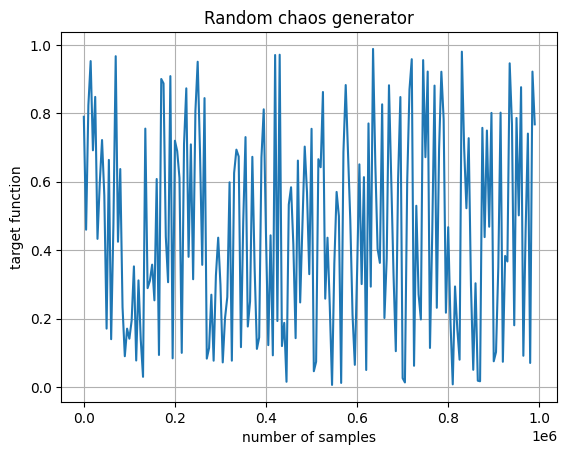

In [6]:
time_x , points_y = chaos_generator(1000000,200)
display_graph(time_x , points_y)

In [7]:
"""Rosenstein approach"""

### Estimator parameters
J = 1
## m = 1:5 
m = 5
M = len(points_y) - (m-1)*J
#X_matrix = np.empty((M,m), dtype="float32")

###sequence for attractors
#idx = []
#idx.append(1)
#list_of_point_y =[]
#for i in range(1,M-1): 
 #  idx.append(i+(m-1)*J)
  # list_of_point_y.append(points_y[idx[i]])
len(points_y)

199

In [8]:
"""defining euclidian distance"""
def Euclidian(xi  , xe): 

    return np.sqrt(pow(xi - xe),2)

In [9]:
def phase_dim(x,m,tao,npoint):
    n = len(x)
    mm = npoint #or m=n-(m-1)*tao
    x = np.array(x)
    y = np.zeros([mm,m])

    for i in range(m):
        idx = np.linspace(0,mm-1,mm)
        tmp_idx = idx+((i-1)*tao)
        b = tmp_idx.astype(int)
        y[:,i] = x[b].T

    return y

In [10]:
phase_dim(points_y,1,1,M)

array([[0.76805416],
       [0.79016028],
       [0.45984206],
       [0.82372197],
       [0.95309029],
       [0.692094  ],
       [0.84833121],
       [0.43302156],
       [0.59645099],
       [0.7221338 ],
       [0.55994149],
       [0.17047767],
       [0.66394402],
       [0.13948383],
       [0.47566546],
       [0.96737386],
       [0.42458026],
       [0.63725955],
       [0.23327037],
       [0.08963861],
       [0.17029149],
       [0.14091859],
       [0.19398047],
       [0.35253652],
       [0.07720162],
       [0.31155008],
       [0.13820761],
       [0.02940962],
       [0.75555566],
       [0.2888921 ],
       [0.31018711],
       [0.35756912],
       [0.25320896],
       [0.60815001],
       [0.09334169],
       [0.90073368],
       [0.88788456],
       [0.43938592],
       [0.30616111],
       [0.90907307],
       [0.08357058],
       [0.72011744],
       [0.6900137 ],
       [0.61115777],
       [0.09952039],
       [0.70977195],
       [0.87333161],
       [0.380

In [17]:
def lyapunov_rosenstein(x,m,tao,dt=0.01):
 
    nn = len(x)
    mm = nn-(m-1)*tao

    yy = phase_dim(x,m,tao,mm)
    #print(yy)
    neardis = np.zeros(mm)
    nearpos = np.zeros(mm)
    dd = np.zeros(100000)

    for i in range(mm):
        x0 = np.ones([mm,1])*yy[i,:]
        distance = np.sqrt(np.sum(pow((yy-x0),2),axis=1))
        for j in range(mm):
            if(np.abs(j-i)<=1):
                distance[j]=1e10         
        neardis[i] = min(distance)
        nearpos[i] = int(np.where(distance == min(distance))[0][0])

    for k in range(100000):
        maxind=mm-k
        evolve=0
        pnt=0
        for j in range(mm):
            if (j<maxind and nearpos[j]<= maxind):
                dist_k = np.sqrt(sum(np.power(yy[int(j+k-1),:]-yy[int(nearpos[j]+k-1),:],2)))  
                if(int(dist_k) != 0.0):
                    evolve = evolve+np.log(dist_k)
                    pnt += 1
        if pnt > 0:
            dd[k] = evolve/float(pnt)
        else:
            dd[k] = 0

        
    fs = 1./dt #100.0 #sampling frequency
    tlinear = np.linspace(0,len(dd)-1,len(dd)) 
    ff = np.polyfit(tlinear,dd,1)
    polynomial = np.poly1d(ff)
    ys = polynomial(tlinear)
    lle = ff[0]

    return ff[1]

In [18]:
luypunov_major_exponent = lyapunov_rosenstein(points_y,5,1)

 #lyuapnuv's exponent for randomly generated chaos
print("luypunov major exponent = ",luypunov_major_exponent)

# lorentz Series
df.columns = ['Nums']
df_new = df.iloc[:1000]
print('Data shape', df_new.shape)
df.head()

# array of values
lorentz = df_new

lorentz_major_exponent = lyapunov_rosenstein(lorentz, 2,1)

print("luypunov major exponent for lorentz = ",lorentz_major_exponent)

#regular time series not stohastic


luypunov major exponent =  0.0010176088780530213
Data shape (1000, 1)
luypunov major exponent for lorentz =  0.0007246963435570372


### baseline prediction

In [12]:
def Predict_pull(pattern_set, x, pattern_samples, eps=0.01, sigma=0.01, tresh_size1=0.4, tresh_diff=0.2, eps_cl=0.005, min_samples_cl=5): 
        ##########
        def C(pattern, x):
            c_ = len(x) - np.cumsum(pattern[::-1])

            return x[c_][::-1]
        #########
        def Possible_predictions(pattern, x, Ca):
            C_ = C(pattern, x).tolist()
            C_ = [np.float32(i) if i != 'N' else 'N' for i in C_]
            TrCa = Ca[:,:-1]
            if 'N' in C_:

                return []
            else :
                d = distance.cdist(TrCa, [C_], 'euclidean')
                closed_mot_index = np.where(d < eps)[0]
                Possible_predictions_ = Ca[closed_mot_index, -1]

                return Possible_predictions_
        ##########
        def prediction_one_step(Q):
            Qreshape = Q.reshape(len(Q),1)
            c = DBSCAN1D(eps=eps_cl, min_samples=min_samples_cl)
            l = c.fit_predict(Qreshape)
            count_cl = np.array(np.unique(l, return_counts = True)).T
            count_cl_without_noize = count_cl[~np.isin(count_cl[:,0],[-1])]
            if count_cl_without_noize.shape[0] == 0:

                return 'N'
            else:
                count_cl_without_noize_sorted = count_cl_without_noize[np.argsort(count_cl_without_noize[:,1]), :]
                size1 = count_cl_without_noize_sorted[-1, 1] / Q.size 
                if count_cl_without_noize_sorted.shape[0] > 1:
                    size2 = count_cl_without_noize_sorted[-2, 1] / Q.size 
                else:
                    size2 = 0
                if size2 != 0:
                    if (size1 < tresh_size1) | (size1 - size2 < tresh_diff):

                        return 'N'
                    else:

                        return np.mean(Q[np.where(l == count_cl_without_noize_sorted[-1, 0])]) + np.random.normal(0, sigma, 1)[0]
                else:
                    if size1 < tresh_size1:
                        
                        return 'N'
                    else:
                        
                        return np.mean(Q[np.where(l == count_cl_without_noize_sorted[-1, 0])]) + np.random.normal(0, sigma, 1)[0]
        Qlist = np.array([Possible_predictions(pattern_set[i], x, pattern_samples[i]) for i in  range(len(pattern_set))])
        Q = np.hstack(Qlist)
        if len(Q) == 0:

            return 'N'
        else:

            return prediction_one_step(Q)

In [13]:
pred = []
T = 50
for t in range(T):
    a = Predict_pull(pattern_set, np.append(x, pred), Ca_set_direct, eps=0.005, sigma=0.0, tresh_size1=0.4, tresh_diff=0.2, eps_cl=0.005, min_samples_cl=5)
    pred.append(a)

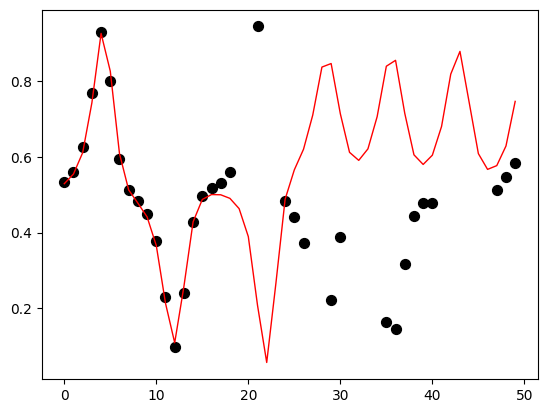

In [14]:
pred_ = [pred[i] if pred[i] != 'N' else np.nan for i in range(T)]
plt.plot(np.arange(T), y_true[:T], color='r', linewidth=1)
plt.scatter(np.arange(T), pred_, color='black', s=50)